In [2]:
import torch
import pandas as pd
import pathlib
import re
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import squareform, pdist
from Bio.PDB import *

/home/collin/.virtualenvs/protein_gan/lib/python3.6/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 7569.
  PDBConstructionWarning,
/home/collin/.virtualenvs/protein_gan/lib/python3.6/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 7579.
  PDBConstructionWarning,


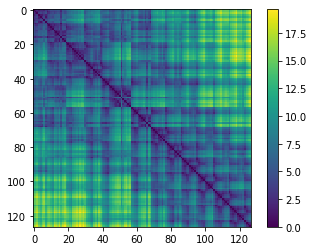

/home/collin/.virtualenvs/protein_gan/lib/python3.6/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3740.
  PDBConstructionWarning,
/home/collin/.virtualenvs/protein_gan/lib/python3.6/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3787.
  PDBConstructionWarning,
/home/collin/.virtualenvs/protein_gan/lib/python3.6/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 3828.
  PDBConstructionWarning,
/home/collin/.virtualenvs/protein_gan/lib/python3.6/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 3849.
  PDBConstructionWarning,
/home/collin/.virtualenvs/protein_gan/lib/python3.6/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3872.
  PDBConstructionWarning,
/home/collin/.virtua

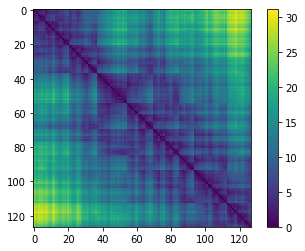

In [46]:
def generate_maps(input_path: str, output_path: str, res: int)
    """
    Generate a-carbon maps given a input directory 
    """
    cwd = pathlib.Path(input_path).glob("*.pdb")
    # Create A chain maps as matrices
    parser = PDBParser()
    io = PDBIO()
    for files in cwd:
        structure = parser.get_structure('X', files)
        atom_list = Selection.unfold_entities(structure[0]['A'], 'A')[1:]
        arr_coord = []
        for atom in atom_list[0:res-1]:
            x = atom.get_coord()
            arr_coord.append({'X': x[0],'Y':x[1],'Z':x[2]})
        coord_table = pd.DataFrame(arr_coord)
        dist = pdist(coord_table, metric = 'euclidean')
        distance_matrix = squareform(dist)
        # TODO: Save matrices in desired location
